# Part 0: Representing numbers as strings

The following exercises are designed to reinforce your understanding of how we can view the encoding of a number as string of digits in a given base.

> If you are interested in exploring this topic in more depth, see the ["Floating-Point Arithmetic" section](https://docs.python.org/3/tutorial/floatingpoint.html) of the Python documentation.

## Integers as strings

Consider the string of digits:

```python
    '16180339887'
```

If you are told this string is for a decimal number, meaning the base of its digits is ten (10), then its value is given by

$$
    [\![ \mathtt{16180339887} ]\!]_{10} = (1 \times 10^{10}) + (6 \times 10^9) + (1 \times 10^8) + \cdots + (8 \times 10^1) + (7 \times 10^0) = 16,\!180,\!339,\!887.
$$

Similarly, consider the following string of digits:

```python
    '100111010'
```

If you are told this string is for a binary number, meaning its base is two (2), then its value is

$$
    [\![ \mathtt{100111010} ]\!]_2 = (1 \times 2^8) + (1 \times 2^5) + \cdots + (1 \times 2^1).
$$

(What is this value?)

And in general, the value of a string of $d+1$ digits in base $b$ is,

$$
  [\![ s_d s_{d-1} \cdots s_1 s_0 ]\!]_b = \sum_{i=0}^{d} s_i \times b^i.
$$  

**Bases greater than ten (10).** Observe that when the base at most ten, the digits are the usual decimal digits, `0`, `1`, `2`, ..., `9`. What happens when the base is greater than ten? For this notebook, suppose we are interested in bases that are at most 36; then, we will adopt the convention of using lowercase Roman letters, `a`, `b`, `c`, ..., `z` for "digits" whose values correspond to 10, 11, 12, ..., 35.

---

## **Exercise 0** (3 points) 
Write a function, `eval_strint(s, base)`. It takes a string of digits `s` in the base given by `base`. It returns its value as an integer.

That is, this function implements the mathematical object, $[\![ s ]\!]_b$, which would convert a string $s$ to its numerical value, assuming its digits are given in base $b$. For example:

```python
    eval_strint('100111010', base=2) == 314
```

> Hint: Python makes this exercise very easy. Search Python's online documentation for information about the `int()` constructor to see how you can apply it to solve this problem. (You have encountered this constructor already, in Notebook/Assignment 2.)

In [69]:
?int

In [70]:
num_str = "123"
num_int = int(num_str)
num_int

123

In [71]:
binary_str = "1010"
num_int = int(binary_str, 2)  # Converts binary string to decimal 
num_int

10

In [72]:
binary_str = "6040"
num_int = int(binary_str, 8)  # Converts octal string to decimal 
num_int

3104

In [73]:
binary_str = "4321"
num_int = int(binary_str, 5)  # Converts quinary string to decimal 
num_int

586

In [74]:
int('deadbeef', 16)

3735928559

In [75]:
int('0b100', base=0)

4

Note to self, stating '0b' means that the number that comes after is a binary number

'100' in binary is equal to 4 in decimal. In binary, each position represents a power of 2, starting from the rightmost position with 2^0 and doubling as you move to the left. So, '100' is calculated as (1 * 2^2) + (0 * 2^1) + (0 * 2^0) = 4.

That's why int('0b100', base=0) returns 4. The base=0 argument allows Python to automatically determine the base of the number based on the prefix (in this case, binary).

<!-- Expected demo output text block -->
The demo included in the solution cell below should display the following output:
```
eval_strint('6040', 8) -> 3104
eval_strint('deadbeef', 16) -> 3735928559
eval_strint('4321', 5) -> 586
```
<!-- Include any shout outs here -->
**Note**: This demo calls your function 3 times.

In [76]:
### Exercise 0 solution
def eval_strint(s, base=2):
    assert type(s) is str
    assert 2 <= base <= 36
    
    return int(s, base) # JUST USE INT FUNCTION
    
### demo function call
print(f"eval_strint('6040', 8) -> {eval_strint('6040', 8)}")
print(f"eval_strint('deadbeef', 16) -> {eval_strint('deadbeef', 16)}")
print(f"eval_strint('4321', 5) -> {eval_strint('4321', 5)}")

eval_strint('6040', 8) -> 3104
eval_strint('deadbeef', 16) -> 3735928559
eval_strint('4321', 5) -> 586


<!-- Test Cell Boilerplate -->
The cell below will test your solution for Exercise 0. The testing variables will be available for debugging under the following names in a dictionary format.
- `input_vars` - Input variables for your solution. 
- `original_input_vars` - Copy of input variables from prior to running your solution. These _should_ be the same as `input_vars` - otherwise the inputs were modified by your solution.
- `returned_output_vars` - Outputs returned by your solution.
- `true_output_vars` - The expected output. This _should_ "match" `returned_output_vars` based on the question requirements - otherwise, your solution is not returning the correct output. 

In [77]:
### test_cell_ex0

from tester_fw.testers import Tester

conf = {
    'case_file':'tc_0', 
    'func': eval_strint, # replace this with the function defined above
    'inputs':{ # input config dict. keys are parameter names
        's':{
            'dtype':'str', # data type of param.
            'check_modified':True,
        },
        'base':{
            'dtype':'int', # data type of param.
            'check_modified':False,
        }
    },
    'outputs':{
        'output_0':{
            'index':0,
            'dtype':'int',
            'check_dtype': True,
        }
    }
}
tester = Tester(conf, key=b'5-YWQCrNnF3Ml5qmSo2ksFUYNZ0P3yFcpeSKtQFaULk=', path='resource/asnlib/publicdata/')
for _ in range(70):
    try:
        tester.run_test()
        (input_vars, original_input_vars, returned_output_vars, true_output_vars) = tester.get_test_vars()
    except:
        (input_vars, original_input_vars, returned_output_vars, true_output_vars) = tester.get_test_vars()
        raise
print('Passed! Please submit.')

Passed! Please submit.


---

## Fractional values

Recall that we can extend the basic string representation to include a fractional part by interpreting digits to the right of the "fractional point" (i.e., "the dot") as having negative indices. For instance,

$$
    [\![ \mathtt{3.14} ]\!]_{10} = (3 \times 10^0) + (1 \times 10^{-1}) + (4 \times 10^{-2}).
$$

Or, in general,

$$
  [\![ s_d s_{d-1} \cdots s_1 s_0 \, \underset{\Large\uparrow}{\Huge\mathtt{.}} \, s_{-1} s_{-2} \cdots s_{-r} ]\!]_b = \sum_{i=-r}^{d} s_i \times b^i.
$$

## **Exercise 1** (4 points) 
Suppose a string of digits `s` in base `base` contains up to one fractional point. Complete the function, `eval_strfrac(s, base)`, so that it returns its corresponding floating-point value.

Your function should *always* return a value of type `float`, even if the input happens to correspond to an exact integer.

Examples:

```python
    eval_strfrac('3.14', base=10) ~= 3.14
    eval_strfrac('100.101', base=2) == 4.625
    eval_strfrac('2c', base=16) ~= 44.0   # Note: Must be a float even with an integer input!
```

> _Comment._ Because of potential floating-point roundoff errors, as explained in the videos, conversions based on the general polynomial formula given previously will not be exact. The testing code will include a built-in tolerance to account for such errors.
>
> _Hint._ You should be able to construct a solution that reuses the function, `eval_strint()`, from Exercise 0.

<!-- Expected demo output text block -->
The demo included in the solution cell below should display the following output:
```
eval_strfrac('3.14', base=10) -> 3.14
eval_strfrac('100.101', base=2) -> 4.625
eval_strfrac('2c', base=16) -> 44.0
```
<!-- Include any shout outs here -->
**Note**: This demo calls your function 3 times.

In [78]:
len('101')

3

In [79]:
d = '1001'

d.split('.')

['1001']

In [80]:
int_, frac_ = d, '0'

In [81]:
frac_

'0'

In [82]:
int_

'1001'

---

In [83]:
s = '100.101'
base = 2

In [84]:
if '.' in s:
    int_, frac_ = s.split('.')
else:
    int_, frac_ = s, '0'

In [85]:
int_

'100'

In [86]:
eval_strint(int_, base)

4

In [87]:
frac_

'101'

In [88]:
eval_strint(frac_, base)

5

In [89]:
(base ** len(frac_))

8

In [90]:
eval_strint(frac_, base)/(base ** len(frac_))

0.625

If I forget why the last three line of code makes mathematical sense, look at the picture below.

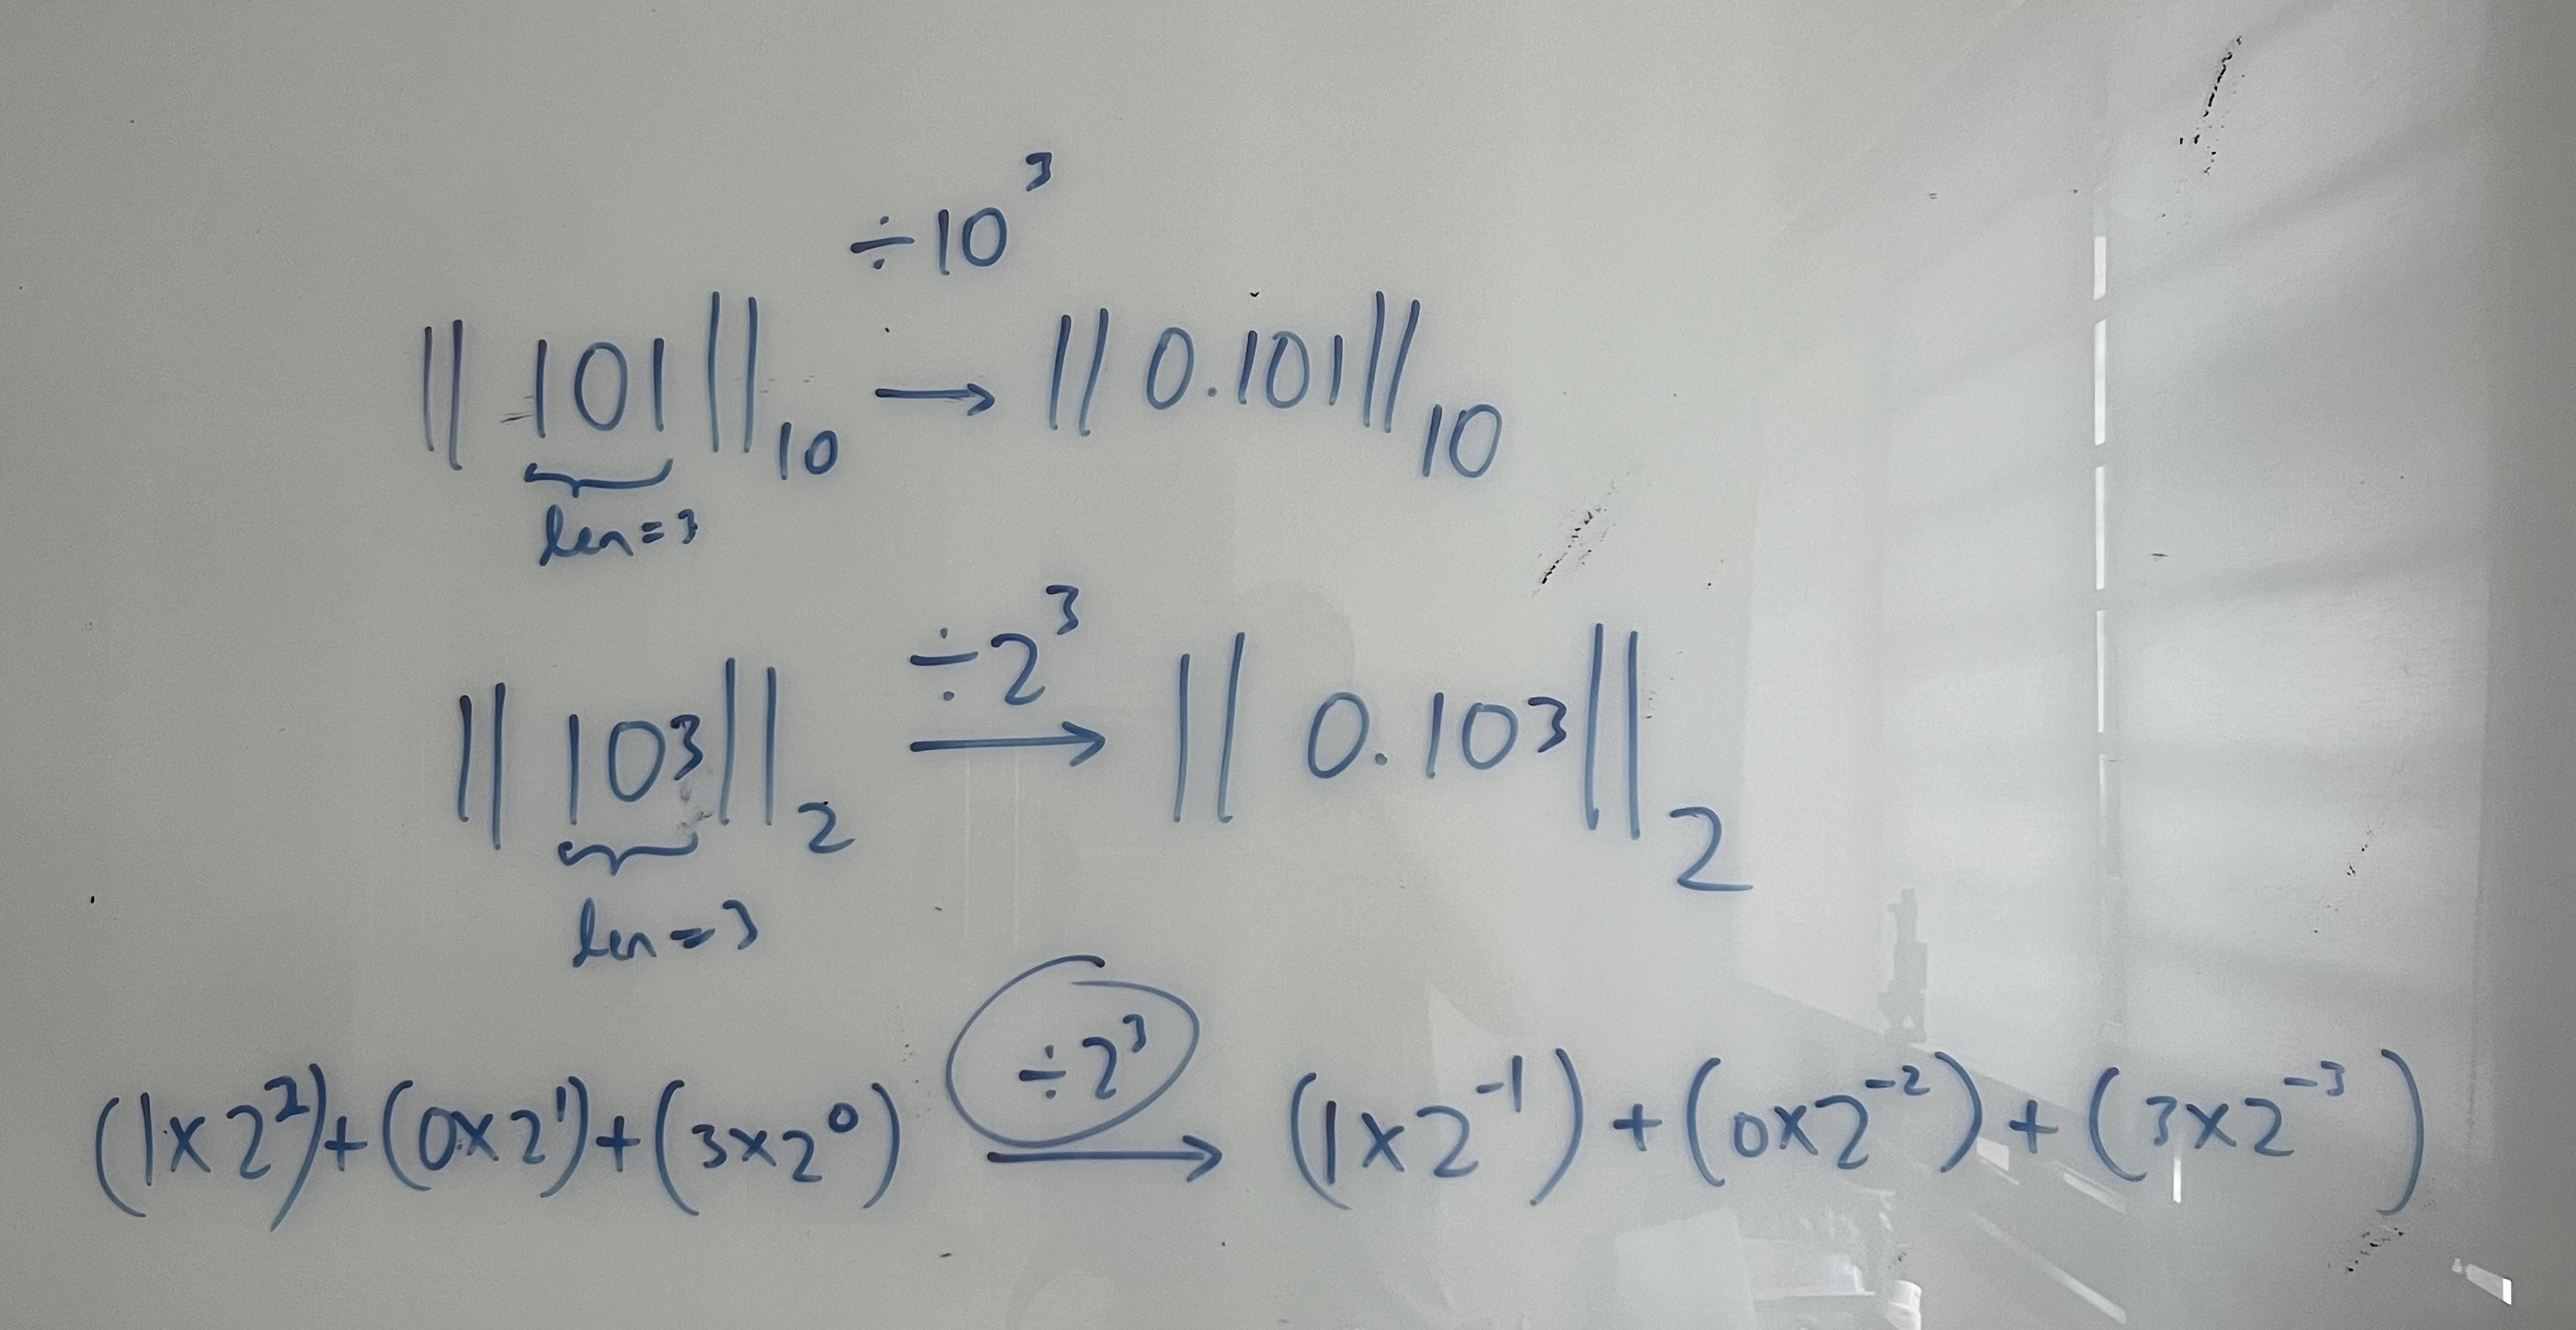

In [91]:
def eval_strfrac(s, base=10):
    assert type(s) is str
    assert 2 <= base <= 36
    
    # Split the string into integer and fractional parts using the decimal point
    if '.' in s:
        int_, frac_ = s.split('.')
    else:
        int_ = s
        frac_ = '0'
        
    int_val = eval_strint(int_, base)
    
    frac_val = eval_strint(frac_, base) / (base ** len(frac_))
    
    result = int_val + frac_val
    
    return float(result)

In [92]:
### demo function call
print(f"eval_strfrac('3.14', base=10) -> {eval_strfrac('3.14', base=10)}") 
print(f"eval_strfrac('100.101', base=2) -> {eval_strfrac('100.101', base=2)}")
print(f"eval_strfrac('2c', base=16) -> {eval_strfrac('2c', base=16)}")

eval_strfrac('3.14', base=10) -> 3.14
eval_strfrac('100.101', base=2) -> 4.625
eval_strfrac('2c', base=16) -> 44.0


<!-- Test Cell Boilerplate -->
The cell below will test your solution for Exercise 1. The testing variables will be available for debugging under the following names in a dictionary format.
- `input_vars` - Input variables for your solution. 
- `original_input_vars` - Copy of input variables from prior to running your solution. These _should_ be the same as `input_vars` - otherwise the inputs were modified by your solution.
- `returned_output_vars` - Outputs returned by your solution.
- `true_output_vars` - The expected output. This _should_ "match" `returned_output_vars` based on the question requirements - otherwise, your solution is not returning the correct output. 

In [93]:
### test_cell_ex1
from tester_fw.testers import Tester

conf = {
    'case_file':'tc_1', 
    'func': eval_strfrac, 
    'inputs':{ 
        's':{
            'dtype':'str', 
            'check_modified':True,
        },
        'base':{
            'dtype':'int', 
            'check_modified':False,
        }
    },
    'outputs':{
        'output_0':{
            'index':0,
            'dtype':'float',
            'check_dtype': True,
            'float_tolerance': 10 ** (-7)
        }
    }
}
tester = Tester(conf, key=b'5-YWQCrNnF3Ml5qmSo2ksFUYNZ0P3yFcpeSKtQFaULk=', path='resource/asnlib/publicdata/')
for _ in range(70):
    try:
        tester.run_test()
        (input_vars, original_input_vars, returned_output_vars, true_output_vars) = tester.get_test_vars()
    except:
        (input_vars, original_input_vars, returned_output_vars, true_output_vars) = tester.get_test_vars()
        raise

print('Passed! Please submit.')

Passed! Please submit.


---

## Floating-point encodings

Recall that a floating-point encoding or format is a normalized scientific notation consisting of a _base_, a _sign_, a fractional _significand_ or _mantissa_, and a signed integer _exponent_. Conceptually, think of it as a tuple of the form, $(\pm, [\![s]\!]_b, x)$, where $b$ is the digit base (e.g., decimal, binary); $\pm$ is the sign bit; $s$ is the significand encoded as a base $b$ string; and $x$ is the exponent. For simplicity, let's assume that only the significand $s$ is encoded in base $b$ and treat $x$ as an integer value. Mathematically, the value of this tuple is $\pm \, [\![s]\!]_b \times b^x$.

**IEEE double-precision.** For instance, Python, R, and MATLAB, by default, store their floating-point values in a standard tuple representation known as _IEEE double-precision format_. It's a 64-bit binary encoding having the following components:

- The most significant bit indicates the sign of the value.
- The significand is a 53-bit string with an _implicit_ leading one. That is, if the bit string representation of $s$ is $s_0 . s_1 s_2 \cdots s_d$, then $s_0=1$ always and is never stored explicitly. That also means $d=52$.
- The exponent is an 11-bit string and is treated as a signed integer in the range $[-1022, 1023]$.

Thus, the smallest positive value in this format $2^{-1022} \approx 2.23 \times 10^{-308}$, and the smallest positive value greater than 1 is $1 + \epsilon$, where $\epsilon=2^{-52} \approx 2.22 \times 10^{-16}$ is known as _machine epsilon_ (in this case, for double-precision).

**Special values.** You might have noticed that the exponent is slightly asymmetric. Part of the reason is that the IEEE floating-point encoding can also represent several kinds of special values, such as infinities and an odd bird called "not-a-number" or `NaN`. This latter value, which you may have seen if you have used any standard statistical packages, can be used to encode certain kinds of floating-point exceptions that result when, for instance, you try to divide zero by zero.

> If you are familiar with languages like C, C++, or Java, then IEEE double-precision format is the same as the `double` primitive type. The other common format is single-precision, which is `float` in those same languages.

In [94]:
def print_fp_hex(v):
    assert type(v) is float
    print("v = {} ==> v.hex() == '{}'".format(v, v.hex()))
    
print_fp_hex(0.0)
print_fp_hex(1.0)
print_fp_hex(16.0625)
print_fp_hex(-0.1)

v = 0.0 ==> v.hex() == '0x0.0p+0'
v = 1.0 ==> v.hex() == '0x1.0000000000000p+0'
v = 16.0625 ==> v.hex() == '0x1.0100000000000p+4'
v = -0.1 ==> v.hex() == '-0x1.999999999999ap-4'


In [95]:
print(16.0625.hex())

0x1.0100000000000p+4


In [96]:
v=-0.1
print(v.hex())

-0x1.999999999999ap-4


In [97]:
?hex

Signature: hex(number, /)
    
Docstring:
    
Return the hexadecimal representation of an integer.

---

**Inspecting a floating-point number in Python.** Python provides support for looking at floating-point values directly! Given any floating-point variable, `v` (that is, `type(v) is float`), the method `v.hex()` returns a string representation of its encoding. It's easiest to see by example, so run the following code cell:

Observe that the format has these properties:
* If `v` is negative, the first character of the string is `'-'`.
* The next two characters are always `'0x'`.
* Following that, the next characters up to but excluding the character `'p'` is a fractional string of hexadecimal (base-16) digits. In other words, this substring corresponds to the significand encoded in base-16.
* The `'p'` character separates the significand from the exponent. The exponent follows, as a signed integer (`'+'` or `'-'` prefix). Its implied base is two (2)---**not** base-16, even though the significand is.

Thus, to convert this string back into the floating-point value, you could do the following:
* Record the sign as a value, `v_sign`, which is either +1 or -1.
* Convert the significand into a fractional value, `v_signif`, assuming base-16 digits.
* Extract the exponent as a signed integer value, `v_exp`.
* Compute the final value as `v_sign * v_signif * (2.0**v_exp)`.

For example, here is how you can get 16.025 back from its `hex()` representation, `'0x1.0100000000000p+4'`:

In [98]:
# Recall: v = 16.0625 ==> v.hex() == '0x1.0100000000000p+4'
print((+1.0) * eval_strfrac('1.0100000000000', base=16) * (2**4))

16.0625


---

## Exercise 2 - (**4** Points): 
Write a function, `fp_bin(v)`, that determines the IEEE-754 tuple representation of any double-precision floating-point value, `v`. That is, given the variable `v` such that `type(v) is float`, it should return a tuple with three components, `(s_sign, s_signif, v_exp)` such that

* `s_sign` is a string representing the sign bit, encoded as either a `'+'` or `'-'` character;
* `s_signif` is the significand, which should be a string of 54 bits having the form, `x.xxx...x`, where there are (at most) 53 `x` bits (0 or 1 values);
* `v_exp` is the value of the exponent and should be an _integer_.

For example:

```python
    v = -1280.03125
    assert v.hex() == '-0x1.4002000000000p+10'
    assert fp_bin(v) == ('-', '1.0100000000000010000000000000000000000000000000000000', 10)
```

> There are many ways to approach this problem. One we came up exploits the observation that $[\![\mathtt{0}]\!]_{16} == [\![\mathtt{0000}]\!]_2$ and $[\![\mathtt{f}]\!]_{16} = [\![\mathtt{1111}]\!]$ and applies an idea in this Stackoverflow post: https://stackoverflow.com/questions/1425493/convert-hex-to-binary

In [99]:
?hex

In [124]:
# Demo of `float.hex()`
v = -1280.03125
print(v.hex())

-0x1.4002000000000p+10


I need to change '1.4002000000000' to '1.0100000000000010000000000000000000000000000000000000'

So I need to change the original number to hex and then change it to binary.

In [137]:
hex_ = v.hex()
hex_

'-0x1.4002000000000p+10'

In [138]:
exponent = hex_.split('p')[1]
exponent

'+10'

In [139]:
sign = hex_[0]
sign

'-'

In [140]:
first = hex_.find('x')+1
last = hex_.find('p')
hex_ = hex_[first:last].replace('.','')
hex_

'14002000000000'

In [141]:
hex_=int(hex_,16)
hex_

5629636973166592

In [142]:
hex_=bin(hex_)
hex_

'0b10100000000000010000000000000000000000000000000000000'

In [143]:
print(type(hex_))

<class 'str'>


In [144]:
hex_

'0b10100000000000010000000000000000000000000000000000000'

In [145]:
hex_=hex_[2:]
hex_

'10100000000000010000000000000000000000000000000000000'

In [146]:
hex_.zfill(53)
hex_

'10100000000000010000000000000000000000000000000000000'

In [147]:
?zfill

Object `zfill` not found.


In [136]:
hex_.split('p')

['10100000000000010000000000000000000000000000000000000']

In [148]:
int(exponent)

10

In [151]:
def fp_bin(v):
    assert type(v) is float

    hex_ = v.hex()
#-----------------------------------------------------------------    
    sign = hex_[0]
    if sign == '0':
        sign = '+'
#-----------------------------------------------------------------
    exponent = int(hex_.split('p')[1])
#-----------------------------------------------------------------
    first = hex_.find('x')+1
    last = hex_.find('p')
    hex_ = hex_[first:last].replace('.','')
    
    significand = bin(int(hex_, 16))[2:].zfill(53)
    significand = significand[0] + '.' + significand[1:]
        
    return (sign, significand, exponent)

In [152]:
# Test the function with the given example
v = -1280.03125
assert v.hex() == '-0x1.4002000000000p+10'
assert fp_bin(v) == ('-', '1.0100000000000010000000000000000000000000000000000000', 10)

In [153]:
fp_bin(v)

('-', '1.0100000000000010000000000000000000000000000000000000', 10)

<!-- Test Cell Boilerplate -->
The cell below will test your solution for Exercise 2. The testing variables will be available for debugging under the following names in a dictionary format.
- `input_vars` - Input variables for your solution. 
- `original_input_vars` - Copy of input variables from prior to running your solution. These _should_ be the same as `input_vars` - otherwise the inputs were modified by your solution.
- `returned_output_vars` - Outputs returned by your solution.
- `true_output_vars` - The expected output. This _should_ "match" `returned_output_vars` based on the question requirements - otherwise, your solution is not returning the correct output. 

In [154]:
### test_cell_ex2
from tester_fw.testers import Tester

conf = {
    'case_file':'tc_2', 
    'func': fp_bin, # replace this with the function defined above
    'inputs':{ # input config dict. keys are parameter names
        'v':{
            'dtype':'float', # data type of param.
            'check_modified':False,
        }
    },
    'outputs':{
        'sign':{
            'index':0,
            'dtype':'',
            'check_dtype': True
        },
        'signif':{
            'index':1,
            'dtype':'',
            'check_dtype': True
        },
        'exponent':{
            'index':2,
            'dtype':'',
            'check_dtype': True
        }
    }
}
tester = Tester(conf, key=b'5-YWQCrNnF3Ml5qmSo2ksFUYNZ0P3yFcpeSKtQFaULk=', path='resource/asnlib/publicdata/')
for _ in range(70):
    try:
        tester.run_test()
        (input_vars, original_input_vars, returned_output_vars, true_output_vars) = tester.get_test_vars()
    except:
        (input_vars, original_input_vars, returned_output_vars, true_output_vars) = tester.get_test_vars()
        raise

print('Passed! Please submit.')

Passed! Please submit.


---

## Exercise 3 - (**2** Points): 
Suppose you are given a floating-point value in a base given by `base` and in the form of the tuple, `(sign, significand, exponent)`, where

* `sign` is either the character '+' if the value is positive and '-' otherwise;
* `significand` is a _string_ representation in base-`base`;
* `exponent` is an _integer_ representing the exponent value.

Complete the function,

```python
def eval_fp(sign, significand, exponent, base):
    ...
```

so that it converts the tuple into a numerical value (of type `float`) and returns it.

For example, `eval_fp('+', '1.25000', -1, base=10)` should return a value that is close to 0.125.

In [158]:
### Define demo inputs

demo_inputs_ex3 = [{'sign': '-', 'significand': '2.G0EBPT', 'exponent': -1, 'base': 32},
                   {'sign': '+', 'significand': '1.20100202211020211211', 'exponent': 4, 'base': 3},
                   {'sign': '+', 'significand': '1.10101110101100100101001111000101', 'exponent': -5, 'base': 2}]

<!-- Expected demo output text block -->
The demo included in the solution cell below should display the following output:
```
eval_fp('-', '2.G0EBPT', -1, 32) -> -0.0781387033930514
eval_fp('+', '1.20100202211020211211', 4, 3) -> 138.25708894296503
eval_fp('+', '1.10101110101100100101001111000101', -5, 2) -> 0.05257526742207119
```
<!-- Include any shout outs here -->
**Note** the demo calls your `fp_bin` solution on 3 sets of inputs.

In [214]:
# Recall: v = 16.0625 ==> v.hex() == '0x1.0100000000000p+4'
print((+1.0) * eval_strfrac('1.0100000000000', base=16) * (2**4))

16.0625


The above code is the key

I need to take the sign x the significand x the base^exponent

In [213]:
sign = '+'
significand='1.20100202211020211211'
exponent = 4
base = 3

In [210]:
if sign == '+':
    sign=1.0
else:
    sign=-1.0

In [211]:
significand = eval_strfrac(significand, base)
significand

1.706877641271173

In [212]:
sign*significand*(base**exponent)

138.25708894296503

---

In [215]:
def eval_fp(sign, significand, exponent, base=2):  
    
    assert sign in ['+', '-']  

    #assert type(exponent) is int 
    if sign == '+':
        sign=1.0
    else:
        sign=-1.0
        
    return sign*eval_strfrac(significand, base)*(base**exponent)

---

In [216]:
for demo_input in demo_inputs_ex3:
    result = eval_fp(demo_input['sign'], demo_input['significand'], demo_input['exponent'], demo_input['base'])
    print(result)
    print(f"eval_fp('{demo_input['sign']}', '{demo_input['significand']}', {demo_input['exponent']}, {demo_input['base']}) -> {eval_fp(**demo_input)}")

-0.0781387033930514
eval_fp('-', '2.G0EBPT', -1, 32) -> -0.0781387033930514
138.25708894296503
eval_fp('+', '1.20100202211020211211', 4, 3) -> 138.25708894296503
0.05257526742207119
eval_fp('+', '1.10101110101100100101001111000101', -5, 2) -> 0.05257526742207119


<!-- Test Cell Boilerplate -->
The cell below will test your solution for Exercise 3. The testing variables will be available for debugging under the following names in a dictionary format.
- `input_vars` - Input variables for your solution. 
- `original_input_vars` - Copy of input variables from prior to running your solution. These _should_ be the same as `input_vars` - otherwise the inputs were modified by your solution.
- `returned_output_vars` - Outputs returned by your solution.
- `true_output_vars` - The expected output. This _should_ "match" `returned_output_vars` based on the question requirements - otherwise, your solution is not returning the correct output. 

In [217]:
### test_cell_ex3
from tester_fw.testers import Tester

conf = {
    'case_file':'tc_3', 
    'func': eval_fp, # replace this with the function defined above
    'inputs':{ # input config dict. keys are parameter names
        'sign':{
            'dtype':'str', # data type of param.
            'check_modified':False,
        },
        'significand':{
            'dtype':'str', # data type of param.
            'check_modified':False,
        },
        'exponent':{
            'dtype':'int', # data type of param.
            'check_modified':False,
        },
        'base':{
            'dtype':'int', # data type of param.
            'check_modified':False,
        }
    },
    'outputs':{
        'output_0':{
            'index':0,
            'dtype':'float',
            'check_dtype': True,
            'check_col_dtypes': True, # Ignored if dtype is not df
            'check_col_order': True, # Ignored if dtype is not df
            'check_row_order': True, # Ignored if dtype is not df
            'check_column_type': True, # Ignored if dtype is not df
            'float_tolerance': 10 ** (-6)
        }
    }
}
tester = Tester(conf, key=b'5-YWQCrNnF3Ml5qmSo2ksFUYNZ0P3yFcpeSKtQFaULk=', path='resource/asnlib/publicdata/')
for _ in range(70):
    try:
        tester.run_test()
        (input_vars, original_input_vars, returned_output_vars, true_output_vars) = tester.get_test_vars()
    except:
        (input_vars, original_input_vars, returned_output_vars, true_output_vars) = tester.get_test_vars()
        raise

print('Passed! Please submit.')

Passed! Please submit.


---

# STOPPED HERE

## Exercise 4 - (**2** Points): 
Suppose you are given two binary floating-point values, `u` and `v`, in the tuple form given above. That is,
```python
    u == (u_sign, u_signif, u_exp)
    v == (v_sign, v_signif, v_exp)
```
where the base for both `u` and `v` is two (2). Complete the function `add_fp_bin(u, v, signif_bits)`, so that it returns the sum of these two values with the resulting significand _truncated_ to `signif_bits` digits.

For example:
```python
u = ('+', '1.010010', 0)
v = ('-', '1.000000', -2)
assert add_fp_bin(u, v, 7) == ('+', '1.000010', 0)  # Caller asks for a significand with 7 digits
```
and:
```python
u = ('+', '1.00000', 0)
v = ('-', '1.00000', -6)
assert add_fp_bin(u, v, 6) == ('+', '1.11111', -1)  # Caller asks for a significand with 6 digits
```
(Check these examples by hand to make sure you understand the intended output.)

> _Note 0_: Assume that `signif_bits` _includes_ the leading 1. For instance, suppose `signif_bits == 4`. Then the significand will have the form, `1.xxx`.
>
> _Note 1_: You may assume that `u_signif` and `v_signif` use `signif_bits` bits (including the leading `1`). Furthermore, you may assume each uses far fewer bits than the underlying native floating-point type (`float`) does, so that you can use native floating-point to compute intermediate values.
>
> _Hint_: An earlier exercise defines a function, `fp_bin(v)`, which you can use to convert a Python native floating-point value (i.e., `type(v) is float`) into a binary tuple representation.

<!-- Test Cell Boilerplate -->
The cell below will test your solution for Exercise 4. The testing variables will be available for debugging under the following names in a dictionary format.
- `input_vars` - Input variables for your solution. 
- `original_input_vars` - Copy of input variables from prior to running your solution. These _should_ be the same as `input_vars` - otherwise the inputs were modified by your solution.
- `returned_output_vars` - Outputs returned by your solution.
- `true_output_vars` - The expected output. This _should_ "match" `returned_output_vars` based on the question requirements - otherwise, your solution is not returning the correct output. 

In [258]:
### Exercise 4 solution
def add_fp_bin(u, v, signif_bits):
    
    u_sign, u_signif, u_exp = u
    
    v_sign, v_signif, v_exp = v
    
#    assert u_signif[:2] in {'1.', '0.'} and len(u_signif) == (signif_bits+1)
#    assert v_signif[:2] in {'1.', '0.'} and len(v_signif) == (signif_bits+1)
    
    u_=eval_fp(u_sign,u_signif,u_exp,base=2)
    
    v_=eval_fp(v_sign,v_signif,v_exp,base=2)
    
    w_=u_+v_
    
    w_sign, w_signif, w_exp = fp_bin(w_)
    
    w_signif=w_signif[:(signif_bits+1)] # the plus one is taking into account the decimal point
    
    return(w_sign,w_signif,w_exp)

In [248]:
u = ('+', '1.010010', 0)
v = ('-', '1.000000', -2)

In [249]:
u_sign, u_signif, u_exp = u
    
v_sign, v_signif, v_exp = v

In [250]:
u_=eval_fp(u_sign,u_signif,u_exp,base=2)
    
v_=eval_fp(v_sign,v_signif,v_exp,base=2)

In [251]:
w_=u_+v_
    
w_sign, w_signif, w_exp = fp_bin(w_)

In [252]:
w_signif

'1.0000100000000000000000000000000000000000000000000000'

In [253]:
signif_bits=7

In [254]:
w_signif=w_signif[:(signif_bits)]
w_signif

'1.00001'

In [255]:
w_signif=w_signif[:(signif_bits+1)]
w_signif

'1.00001'

In [256]:
# These calls to `add_fp_bin` will raise an Assertion error if your solution does not
# return the expected result.

u = ('+', '1.010010', 0)
v = ('-', '1.000000', -2)
assert add_fp_bin(u, v, 7) == ('+', '1.000010', 0)

u = ('+', '1.00000', 0)
v = ('-', '1.00000', -6)
assert add_fp_bin(u, v, 6) == ('+', '1.11111', -1)

In [257]:
### test_cell_ex4
from tester_fw.testers import Tester

conf = {
    'case_file':'tc_4', 
    'func': add_fp_bin, # replace this with the function defined above
    'inputs':{ # input config dict. keys are parameter names
        'u':{
            'dtype':'tuple', # data type of param.
            'check_modified':False,
        },
        'v':{
            'dtype':'tuple', # data type of param.
            'check_modified':False,
        },
        'signif_bits':{
            'dtype':'int', # data type of param.
            'check_modified':False,
        }
    },
    'outputs':{
        'sign':{
            'index':0,
            'dtype':'str',
            'check_dtype': True
        },
        'significand':{
            'index':1,
            'dtype':'str',
            'check_dtype': True
        },
        'exponent':{
            'index':2,
            'dtype':'int',
            'check_dtype': True
        }
    }
}
tester = Tester(conf, key=b'5-YWQCrNnF3Ml5qmSo2ksFUYNZ0P3yFcpeSKtQFaULk=', path='resource/asnlib/publicdata/')
for _ in range(70):
    try:
        tester.run_test()
        (input_vars, original_input_vars, returned_output_vars, true_output_vars) = tester.get_test_vars()
    except:
        (input_vars, original_input_vars, returned_output_vars, true_output_vars) = tester.get_test_vars()
        raise

print('Passed! Please submit.')

Passed! Please submit.


**Fin.** If you have made it this far, congratulations on completing the exam. **Don't forget to submit!**